# Capstone 3 - Data Wrangling

In [81]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
import numpy as np


In [82]:
file = 'Zillow Market Research.csv'
dfHomeValue = pd.read_csv(file)
file = 'Zillow Rental by Zip.csv'
dfRent = pd.read_csv(file)

# import and inspect data
print(dfHomeValue.shape)
dfHomeValue.head()


(30367, 306)


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,194499.00000,...,1017161,1001805,981628,956932,946262,938152,935478,933945,934712,938408
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209719.00000,...,486137,485977,487138,488788,489947,490298,490907,492421,494773,497988
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,220104.00000,...,1047657,1065121,1076998,1077073,1085711,1090631,1095708,1098853,1106245,1123239
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,203697.00000,...,341746,341495,341715,342198,343290,344231,344812,345089,345863,346555
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,282776.00000,...,633132,632775,633032,633716,633404,633244,633346,634618,636295,639390


In [83]:
#inspect rental data

print(dfRent.shape)
dfRent.head()


(3243, 85)


,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,61639,10025,1,"New York, NY",2971.00000,2984.00000,2997.00000,3010.00000,3023.00000,3036.00000,...,3250.00000,3237.00000,3216.00000,3194.00000,3172.00000,3149.00000,3125.00000,3102.00000,3076.00000,3049.00000
1,84654,60657,2,"Chicago, IL",1561.00000,1567.00000,1572.00000,1577.00000,1582.00000,1587.00000,...,1804.00000,1803.00000,1801.00000,1798.00000,1795.00000,1792.00000,1789.00000,1786.00000,1782.00000,1778.00000
2,61637,10023,3,"New York, NY",3145.00000,3154.00000,3162.00000,3170.00000,3177.00000,3184.00000,...,3359.00000,3348.00000,3329.00000,3310.00000,3291.00000,3270.00000,3249.00000,3228.00000,3205.00000,3182.00000
3,91982,77494,4,"Houston, TX",1790.00000,1793.00000,1797.00000,1800.00000,1803.00000,1806.00000,...,1803.00000,1804.00000,1806.00000,1808.00000,1809.00000,1811.00000,1813.00000,1814.00000,1816.00000,1818.00000
4,84616,60614,5,"Chicago, IL",1760.00000,1765.00000,1770.00000,1775.00000,1780.00000,1785.00000,...,2046.00000,2046.00000,2043.00000,2041.00000,2039.00000,2036.00000,2033.00000,2031.00000,2027.00000,2023.00000


In [113]:
# add city and state to rent data set

dfRent['City'] = dfRent.MsaName.str[:-4]
dfRent['State'] = dfRent.MsaName.str[-2:]

In [84]:
#Rename columns, drop unnecessary columns

dfHomeValue.drop(columns = ['RegionID', 'SizeRank'], inplace = True)
dfHomeValue = dfHomeValue.rename(columns={'RegionName': 'ZipCode'})
dfRent = dfRent.rename(columns = {'RegionName': 'ZipCode'})

### Explore Unique Number of Categorical Variables in Each Set

In [85]:
df1 = dfHomeValue.iloc[:,:7].nunique()
df1 /  dfHomeValue.iloc[:,:7].nunique().agg(sum) * 100


ZipCode      63.34773
RegionType    0.00209
StateName     0.10639
State         0.10639
City         30.97190
Metro         1.79611
CountyName    3.66940
dtype: float64

In [86]:
df1 = dfRent.iloc[:,:4].nunique()
df1 /  dfRent.iloc[:,:4].nunique().agg(sum) * 100

RegionID   33.83059
ZipCode    33.83059
SizeRank   31.28521
MsaName     1.05362
dtype: float64

### Plot the Number of Data Points within each state for both the rental and home value files

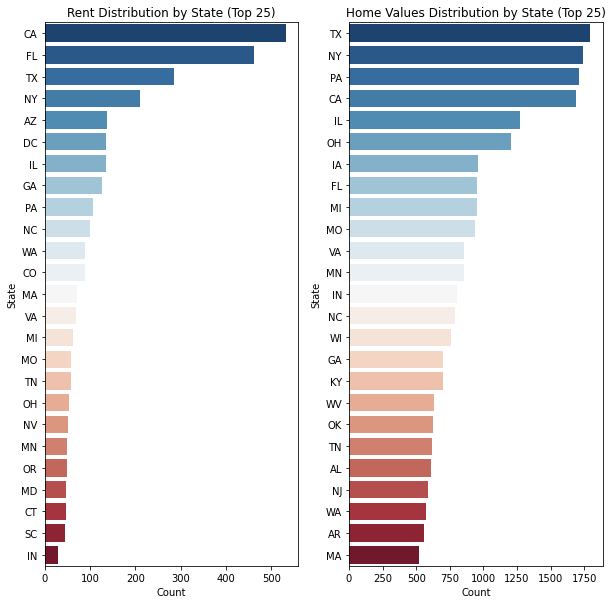

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))

statecount = dfHomeValue.groupby(['ZipCode', 'State']).State.nunique()
statecount = pd.DataFrame(statecount.groupby('State').sum())
statecount.columns = ['Count']
statecount.sort_values(by = 'Count', ascending = False, inplace = True)
statecount = statecount.head(25)

rentstate = dfRent.groupby(['ZipCode', 'State']).State.nunique()
rentstate = pd.DataFrame(rentstate.groupby('State').sum())
rentstate.columns = ['Count']
rentstate.sort_values(by = 'Count', ascending = False, inplace = True)
rentstate = rentstate.head(25)

ax1.set_title('Rent Distribution by State (Top 25)')
ax2.set_title('Home Values Distribution by State (Top 25)')
ax1 = sns.barplot(x=rentstate.Count, y=rentstate.index, palette="RdBu_r", ax = ax1)
ax2 = sns.barplot(x=statecount.Count, y=statecount.index, palette="RdBu_r", ax = ax2)


### Melt the home value file to a format conducive to analysis

In [120]:
#melt data to organize dates as a column attribute
#each row record will represent a date, region, and, price
dfmelt = dfHomeValue.melt(id_vars = ['ZipCode', 'RegionType', 'StateName', 'State', 'City',
                       'Metro', 'CountyName'], var_name = 'Date',value_name = 'Price')
print(dfmelt.shape)
dfmelt.head()


(9018999, 9)


,ZipCode,RegionType,StateName,State,City,Metro,CountyName,Date,Price
0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,194499.00000
1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,209719.00000
2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,220104.00000
3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,203697.00000
4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,282776.00000


In [122]:
#inspect new dataset - need to convert date and price to proper data types
#remove commas from price and convert to float
#convert date to pd datetime
dfmelt['Price'] = dfmelt.Price.apply(lambda x: str(x).replace(',','')).astype('float')
dfmelt['Date'] = pd.to_datetime(dfmelt.Date)
dfmelt['ZipCode'] = dfmelt.ZipCode.astype('object')
dfmelt.dtypes

ZipCode               object
RegionType            object
StateName             object
State                 object
City                  object
Metro                 object
CountyName            object
Date          datetime64[ns]
Price                float64
dtype: object

In [123]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
dfmelt.describe()

,Price
count,6923701.00000
mean,183152.64942
std,175105.14390
min,10093.00000
25%,88292.00000
50%,135352.00000
75%,214650.00000
max,7240530.00000


In [124]:
#filter df to only needed columns
dfMonthlyPrice = dfmelt[['ZipCode', 'Date', 'Price']].dropna()
dfMonthlyPrice.head()

,ZipCode,Date,Price
0,10025,1996-01-31,194499.00000
1,60657,1996-01-31,209719.00000
2,10023,1996-01-31,220104.00000
3,77494,1996-01-31,203697.00000
4,60614,1996-01-31,282776.00000


In [125]:
#drop US record
dfMonthlyPrice = dfMonthlyPrice.drop([0])

dfMonthlyPrice = dfMonthlyPrice.sort_values(by = ['ZipCode','Date'])
dfMonthlyChange = dfMonthlyPrice
dfMonthlyChange['chg'] = dfMonthlyPrice.groupby(['ZipCode'])['Price'].pct_change().fillna(0)

In [126]:
dfMonthlyChange

,ZipCode,Date,Price,chg
4403167,501,2008-01-31,119481.00000,0.00000
4433534,501,2008-02-29,119218.00000,-0.00220
4463901,501,2008-03-31,119363.00000,0.00122
4494268,501,2008-04-30,118971.00000,-0.00328
4524635,501,2008-05-31,118650.00000,-0.00270
...,...,...,...,...
8883995,99929,2020-05-31,237894.00000,0.00431
8914362,99929,2020-06-30,238640.00000,0.00314
8944729,99929,2020-07-31,239688.00000,0.00439
8975096,99929,2020-08-31,240718.00000,0.00430


### Pivot to zip codes on rows. Montlhy percentage price changes as columns for cluster analysis

In [129]:

pvtMonthlyChg = dfMonthlyChange.pivot(index = 'ZipCode',columns = 'Date', values = 'chg')
pvtMonthlyChg = pvtMonthlyChg.dropna()


pvtMonthlyChg

Date,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
ZipCode,,,,,,,,,,,,,,,,,,,,,
1001,0.00000,0.00149,0.00372,0.00450,0.00275,-0.00034,0.00129,0.00126,0.00105,0.00044,...,0.00384,0.00391,0.00391,0.00346,0.00252,0.00302,0.00498,0.00655,0.00807,0.00877
1002,0.00000,-0.00132,-0.00073,-0.00133,-0.00034,-0.00003,0.00114,0.00286,0.00301,0.00075,...,0.00264,0.00548,0.00655,0.00837,0.01003,0.00650,0.00417,0.00381,0.00691,0.00670
1005,0.00000,-0.00258,-0.00050,0.00204,0.00220,0.00491,0.00181,0.00132,-0.00515,-0.00481,...,0.00681,0.00414,0.00257,0.00500,0.00447,0.00266,0.00011,0.00579,0.01140,0.01550
1007,0.00000,-0.00197,0.00014,-0.00075,0.00222,0.00052,0.00179,0.00113,0.00317,0.00506,...,0.00339,0.00559,0.00639,0.01032,0.01295,0.00968,0.00664,0.00647,0.00892,0.00769
1008,0.00000,0.00669,0.00455,0.00626,0.00021,-0.00232,-0.00176,-0.00008,0.00095,0.00043,...,-0.00539,-0.00163,0.00258,-0.00010,0.00000,-0.00294,-0.00029,-0.00147,-0.00092,0.00392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99517,0.00000,0.00272,0.00219,0.00411,0.00351,0.00547,0.00651,0.00473,0.00341,0.00091,...,0.00553,0.00609,-0.00043,0.00122,-0.00690,0.00370,0.00462,0.00935,0.00535,0.00777
99518,0.00000,0.00106,-0.00029,0.00017,0.00018,0.00295,0.00446,0.00391,0.00266,0.00082,...,0.00703,0.00574,-0.00040,-0.00118,-0.00876,0.00015,0.00218,0.00707,0.00296,0.00171
99567,0.00000,0.00932,0.01228,0.02191,0.01606,0.01194,0.00900,0.01140,0.00720,0.00585,...,0.00122,-0.00292,-0.01151,-0.01216,-0.00976,0.00049,-0.00434,-0.00626,-0.01059,-0.00558


In [10]:
#dfAnnualChg = dfRegion.set_index(['Date'])
#dfAnnualChg = dfAnnualChg.groupby('RegionName').resample('A')['Price'].mean().reset_index()


#dfAnnualChg['chg'] = dfAnnualChg.groupby(['RegionName'])['Price'].pct_change().fillna(0)
#pvtAnnualChg = dfAnnualChg.pivot(index = 'RegionName',columns = 'Date', values = 'chg')
#pvtAnnualChg = pvtAnnualChg.dropna()
#pvtAnnualChg

In [130]:
chg_by_month = pvtMonthlyChg.values
#chg_by_year = pvtAnnualChg.values
#normalizer = Normalizer()
#normed = normalizer.fit_transform(chg_by_year)
    
    


## Define K means clustering functions 

In [131]:
def kelbow(df):

    ks = range(1, 25)
    inertias = []

    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters = k)

        # Fit model to samples
        model.fit(df)

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)

    # Plot ks vs inertias
    plt.plot(ks, inertias, '-o')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [132]:
def kPCA(df):
    pca = PCA()
    pca.fit(df)

    # Plot the explained variances
    features = range(pca.n_components_)
    plt.figure(figsize=(20,10))
    plt.bar(features, pca.explained_variance_)
    plt.xlabel('PCA feature')
    plt.ylabel('variance')
    plt.xticks(features)
    plt.show()


    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [133]:
def clustermap(df, clusters):
    # Make a variable called model. We want n_clusters = 3 as parameter to sklearn.cluster.KMeans 
    model = KMeans(n_clusters=clusters)

    # Call a fit_predict() on X 
    cluster_assignments = model.fit_predict(df)

    # Let's visualiaze with colors.ListedColormap
    #cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple'])

    #labels = range(0,4)
    # We're going to do some PCA here. Call decomposition.PCA on sklearn, and pass n_components=2 as parameter
    pca = PCA(n_components=2)
    pc1, pc2 = zip(*pca.fit_transform(df))
    plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), alpha = .5)

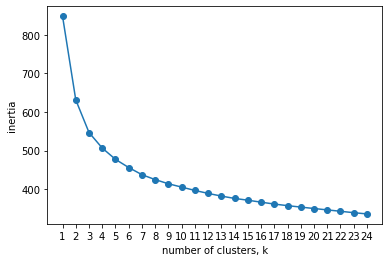

In [17]:
kelbow(chg_by_month)

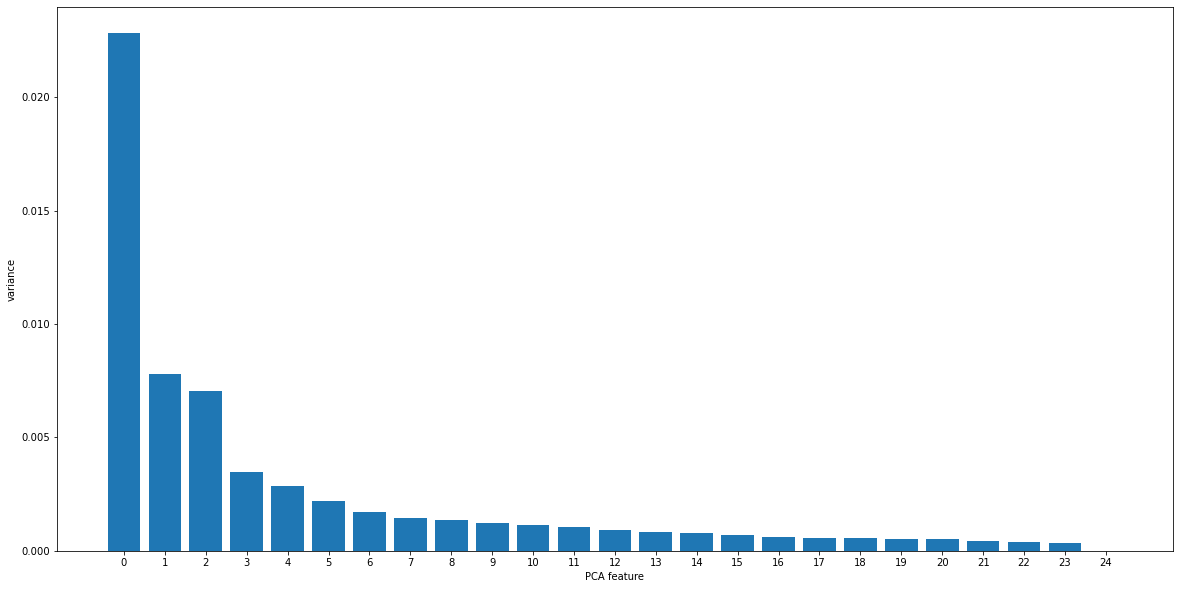

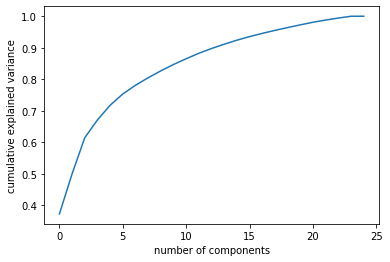

In [18]:
kPCA(chg_by_month)

### Based on initial clustering analysis k = 3 or 4 seems to be the appropriate amount of clusters
### Using PCA to graph out the clusters we can see that 3 offers near perfect segmentation while 4 has some overlap


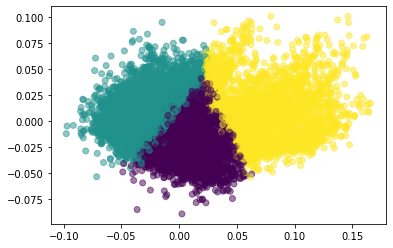

In [134]:
clustermap(chg_by_month,3)

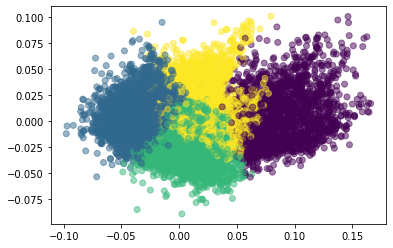

In [135]:
clustermap(chg_by_month,4)

### While there is some overlap between green and yellow clusters, I'll start with setting k = 4 for initial clustering

In [138]:
#I'll use 4 clusters for the segmentation

kmeans = KMeans(n_clusters = 4
               )
# Predict the cluster labels: labels
labels = kmeans.fit_predict(chg_by_month)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'ZipCode': pvtMonthlyChg.index,'labels': labels})

# Display df sorted by cluster label
clustered = pvtMonthlyChg.reset_index().merge(df, on = 'ZipCode')


c_melt = clustered.melt(id_vars = ['ZipCode', 'labels'], var_name = 'Date',value_name = 'Price')


#### Based on the below statistical summary and graph, we can see that the k means algorithm did a decent job clustering the zip codes by monthly volatility over the past 25 years.

#### cluster 2 exibits the least volatility. Averaging a monthly increase of .24 points with a range of less than 1% and a standard deviation of .22%


In [146]:
c_melt_monthly = c_melt.groupby(['Date','labels'])['Price'].mean().reset_index()


In [154]:
avg = c_melt_monthly.groupby('labels')['Price'].mean()
med = c_melt_monthly.groupby('labels')['Price'].median()
min_ = c_melt_monthly.groupby('labels')['Price'].min()
max_ = c_melt_monthly.groupby('labels')['Price'].max()
std_ = c_melt_monthly.groupby('labels')['Price'].std()

summary = pd.DataFrame([avg,med,min_,max_,std_]).T * 100
summary.columns = ['Average', 'Median', 'Min', 'Max', 'Deviation']
summary = round(summary,2)
summary['Range'] = summary.Max - summary.Min
summary

,Average,Median,Min,Max,Deviation,Range
labels,,,,,,
0,0.29000,0.25000,-0.72000,1.30000,0.47000,2.02000
1,0.33000,0.50000,-1.10000,1.05000,0.52000,2.15000
2,0.24000,0.32000,-0.39000,0.56000,0.22000,0.95000
3,0.38000,0.58000,-2.14000,1.94000,0.88000,4.08000


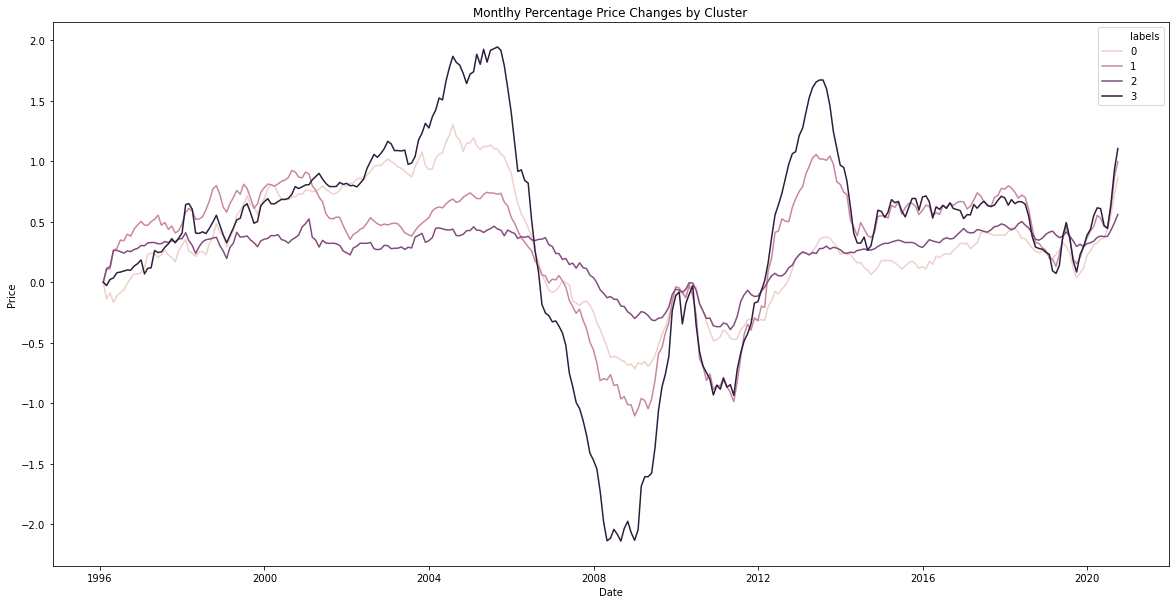

In [157]:
monthly_cluster = c_melt.groupby(['Date','labels'])['Price'].mean().reset_index()
monthly_cluster.Price = monthly_cluster.Price * 100

import seaborn as sns
plt.figure(figsize = (20,10))
plt.title('Montlhy Percentage Price Changes by Cluster')
sns.lineplot(x = 'Date', y = 'Price', data = monthly_cluster, hue = 'labels', color='summer')

#### Based on the initial clustering analysis cluster 2 appears to be the most stable environment to invest in
#### Given it's relative predictability it's also a prime candidate for time series forecasting

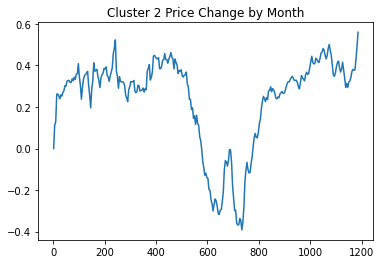

In [312]:
#plot cluster 2 by itself

plt.title('Cluster 2 Price Change by Month')
df = monthly_cluster[monthly_cluster.labels == 2]
df['Price'].plot()

### Test Time Stationarity of Time Series using a Dicky Fuller Test

In [313]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
   
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df['Price'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.43604
p-value                         0.56488
#Lags Used                     16.00000
Number of Observations Used   280.00000
Critical Value (1%)            -3.45392
Critical Value (5%)            -2.87192
Critical Value (10%)           -2.57230
dtype: float64


### Given our test stat is greater than all 3 critical values and the p value is much larger than .05 we can determine that the series is not stationary and differencing will need to be applied

I'll plot the original series and ACF along with the first 2 orders of differencing


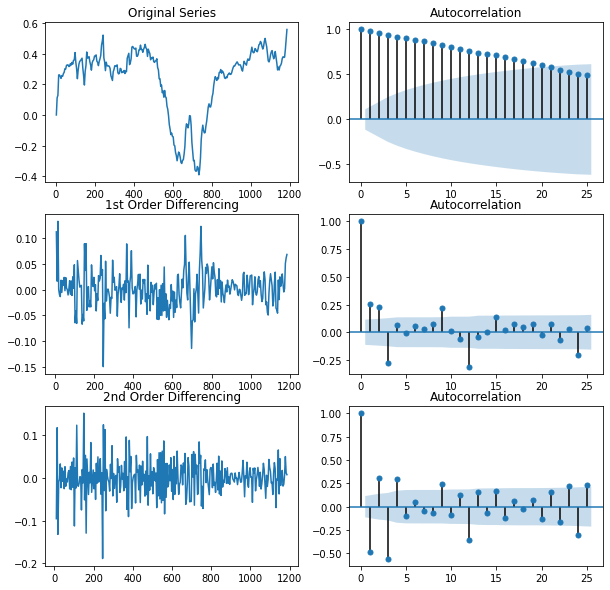

In [314]:


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, figsize = (10,10))

axes[0, 0].plot(df['Price']); axes[0, 0].set_title('Original Series')
plot_acf(df['Price'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Price'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Price'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Price'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [315]:
#the above analysis indicates that we can use 1 or 2 orders of differening
#I'll validate this with another ADF test on the differenced set
# p value well under .05 and test stat is less than critical values of .05 and .10

adf_test(df['Price'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -3.07262
p-value                         0.02865
#Lags Used                     16.00000
Number of Observations Used   279.00000
Critical Value (1%)            -3.45401
Critical Value (5%)            -2.87196
Critical Value (10%)           -2.57232
dtype: float64


Next we need to determin the p and q arguments to be used in the Arima model

We can define appropriate values for our AR (lag) by using a pacf plot
Based on the below an AR term of 1 or 2 is statistically significant


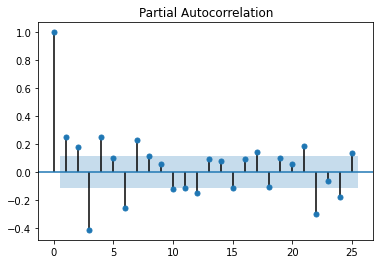

In [316]:
#PACF plot indicates an appropriate p of 1, 2, or 3

_ = plot_pacf(df['Price'].diff().dropna())

Next we'll evaluate the q argument or Moving Average term using a acf plot
lags of 1, 2, and 3 are all statistically significant

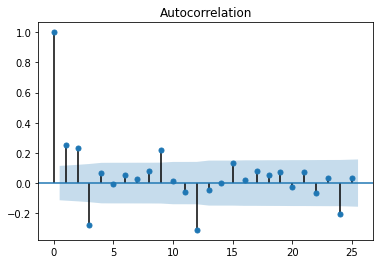

In [317]:
#ACF indicates 1, 2, or 3 for the q value 

_ = plot_acf(df['Price'].diff().dropna())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  296
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 663.317
Method:                       css-mle   S.D. of innovations              0.025
Date:                Tue, 17 Nov 2020   AIC                          -1316.634
Time:                        08:17:13   BIC                          -1298.182
Sample:                             1   HQIC                         -1309.246
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.003      0.685      0.493      -0.004       0.008
ar.L1.D.Price    -0.5051      0.053     -9.534      0.000      -0.609      -0.401
ma.L1.D.Price     1.0326      0.013     

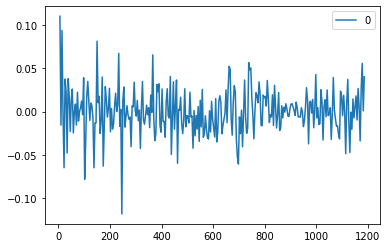

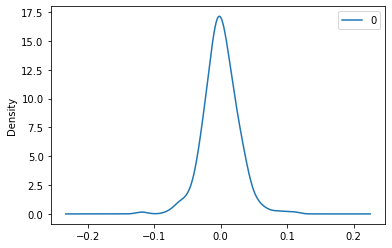

              0
count 296.00000
mean    0.00011
std     0.02643
min    -0.11856
25%    -0.01545
50%    -0.00065
75%     0.01464
max     0.11032


In [318]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf


# fit model
model = ARIMA(df['Price'], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### Testing the Arima Model

PACF and ACF analysis indicated that values of d = [1,2], q = [1,2,3], and p = [1,2] are all appropriate candidates for the model

The below functions will test the accuracy of these using a 75/25 train test split

In [319]:
def ArimaVal(df, pdq, train):    

    p = pdq[0]
    d = pdq[1]
    q = pdq[2]
    
    
    n = int(round(len(df) * train))
    n2 = len(df) - n
    # Create Training and Test
    train = df['Price'][:n]
    test = df['Price'][n:]

    # Build Model
    # model = ARIMA(train, order=(3,2,1))  
    model = ARIMA(train, order=(p,d,q))  
    fitted = model.fit(disp=-1)  

    # Forecast
    fc, se, conf = fitted.forecast(n2, alpha=0.10)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)
    return (forecast_accuracy(fc, test.values, pdq))

# Accuracy metrics
def forecast_accuracy(forecast, actual, pdq):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'pdq_val':str(pdq), 'mape':round(mape,3), 'me':round(me,3), 'mae': round(mae,3), 
            'mpe': round(mpe,3), 'rmse':round(rmse,3), 
            'corr':round(corr,3), 'minmax':round(minmax,3)})


In [320]:
# create list with pdq combinatiosn
import itertools
import warnings
p = range(1,3)
d = range(1,3)
q = range(1,4)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p,d,q))
# Generate all different combinations of seasonal p, d and q triplets
pdqs = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
warnings.filterwarnings("ignore")



In [326]:
dfs = []
for n in pdqs:
    try:
        dfs.append(pd.DataFrame(ArimaVal(df, n, .9), index = [1]))
    except:
        print('N/A')
        
        
accuracy_metrics = pd.concat(dfs).sort_values(by = 'mape')

N/A


In [327]:
accuracy_metrics

,pdq_val,mape,me,mae,mpe,rmse,corr,minmax
1,"(1, 2, 2)",0.23600,0.06900,0.08500,0.20600,0.09500,-0.54500,0.18100
1,"(2, 2, 2)",0.25900,0.08100,0.09200,0.23700,0.10400,-0.20100,0.19300
1,"(1, 1, 1)",0.27700,0.08900,0.09800,0.25800,0.11100,-0.15700,0.20300
1,"(2, 1, 3)",0.28000,0.09300,0.10000,0.26900,0.11200,0.17200,0.20500
1,"(2, 1, 1)",0.28500,0.09200,0.10100,0.26700,0.11400,-0.17100,0.20700
1,"(1, 1, 3)",0.33900,0.11800,0.12100,0.33400,0.13600,-0.14900,0.23500
1,"(1, 1, 2)",0.35400,0.12400,0.12600,0.35100,0.14100,-0.16400,0.24300
1,"(2, 2, 3)",0.37100,0.13100,0.13200,0.37000,0.14800,-0.15500,0.25100
1,"(1, 2, 3)",0.37400,0.13300,0.13300,0.37300,0.15000,-0.15600,0.25200
1,"(1, 2, 1)",0.45700,0.15900,0.16400,0.44700,0.18300,-0.27900,0.29000


In [323]:
def ArimaModel(df,pdq, train):    


    p = pdq[0]
    d = pdq[1]
    q = pdq[2]
    
    n = int(round(len(df) * train))
    n2 = len(df) - n
    # Create Training and Test
    train = df['Price'][:n]
    test = df['Price'][n:]

    # Build Model
    # model = ARIMA(train, order=(3,2,1))  
    model = ARIMA(train, order=(p,d,q))  
    fitted = model.fit(disp=0)  

    # Forecast
    fc, se, conf = fitted.forecast(n2, alpha=0.10)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals. Train Period: ' + str(n) + ' months. Forecast Period:' + str(n2) + ' months')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    print (forecast_accuracy(fc, test.values, pdq))

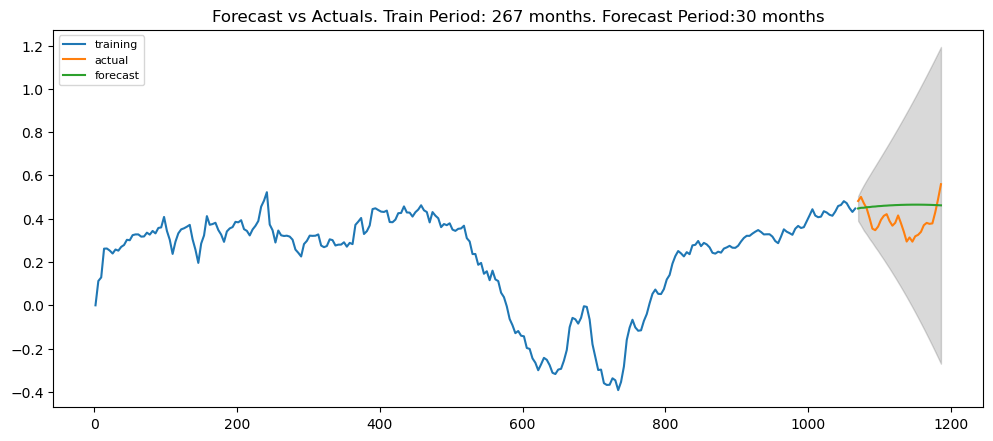

{'pdq_val': '(1, 2, 2)', 'mape': 0.236, 'me': 0.069, 'mae': 0.085, 'mpe': 0.206, 'rmse': 0.095, 'corr': -0.545, 'minmax': 0.181}


In [328]:
#a pdq value of 1,2,2 seems to yield the most accurate results. Let's plot the final values

ArimaModel(df,(1,2,2), .9) 

### Run through the same forecasting process, forecasting the actual home values vs. the percentage change

In [329]:
#define df with clusters and zip codes
clusters = clustered[['ZipCode','labels']]

In [330]:
# merge the monthly absolute prices with the clusters
prices_monthly = dfMonthlyPrice.merge(clusters, on = 'ZipCode')


In [331]:
#filter to cluster 2
prices_monthly = prices_monthly.drop(columns = 'chg')
df = prices_monthly[prices_monthly.labels == 2]

In [332]:
df = pd.DataFrame(df.groupby('Date')['Price'].mean())
df

,Price
Date,
1996-01-31,89360.18279
1996-02-29,89449.72252
1996-03-31,89556.65795
1996-04-30,89776.25100
1996-05-31,89999.96867
...,...
2020-05-31,178843.74277
2020-06-30,179591.44487
2020-07-31,180451.36732


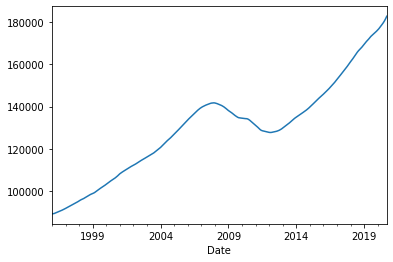

In [333]:
df['Price'].plot()

In [334]:
adf_test(df['Price'])

Results of Dickey-Fuller Test:
Test Statistic                  0.84292
p-value                         0.99230
#Lags Used                     16.00000
Number of Observations Used   280.00000
Critical Value (1%)            -3.45392
Critical Value (5%)            -2.87192
Critical Value (10%)           -2.57230
dtype: float64


In [335]:
adf_test(df['Price'].diff().diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.82988
p-value                         0.05413
#Lags Used                     16.00000
Number of Observations Used   278.00000
Critical Value (1%)            -3.45409
Critical Value (5%)            -2.87199
Critical Value (10%)           -2.57234
dtype: float64


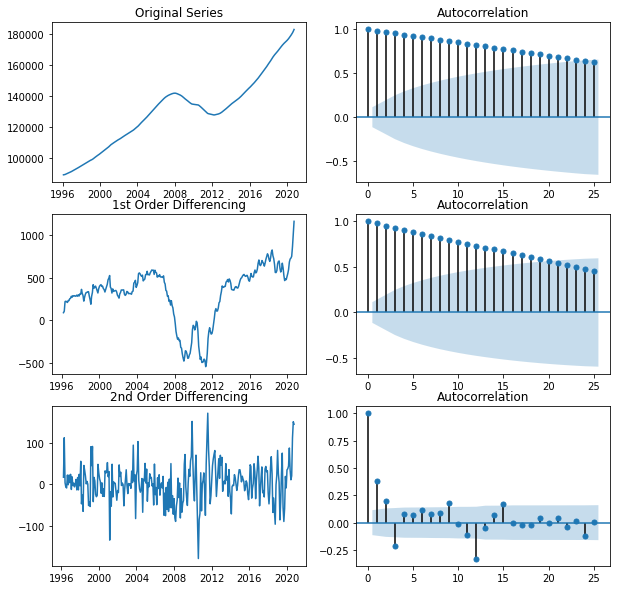

In [336]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize = (10,10))

axes[0, 0].plot(df['Price']); axes[0, 0].set_title('Original Series')
plot_acf(df['Price'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Price'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Price'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Price'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

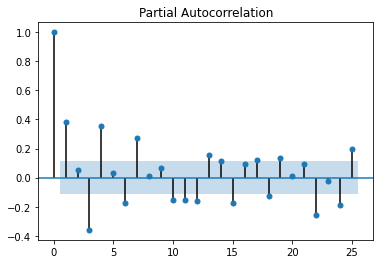

In [337]:
_ = plot_pacf(df['Price'].diff().diff().dropna())

In [338]:
# create list with pdq combinatiosn
import itertools
import warnings
p = range(1,3)
d = range(2,3)
q = range(1,4)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p,d,q))
# Generate all different combinations of seasonal p, d and q triplets
pdqs = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
warnings.filterwarnings("ignore")
pdq

[(1, 2, 1), (1, 2, 2), (1, 2, 3), (2, 2, 1), (2, 2, 2), (2, 2, 3)]

In [342]:
dfs = []
for n in pdqs:
    try:
        dfs.append(pd.DataFrame(ArimaVal(df, n, .90), index = [1]))
    except:
        print('N/A')
        
        
accuracy_metrics = pd.concat(dfs).sort_values(by = 'mape')

Filtering on cluster #2 while using a pdq of 1,2,1 predicts the next 30 monhts with a RMSE of 2,509

In [343]:
accuracy_metrics

,pdq_val,mape,me,mae,mpe,rmse,corr,minmax
1,"(1, 2, 1)",0.01100,1976.06300,2002.07200,0.01100,2509.77100,0.99800,0.01100
1,"(2, 2, 1)",0.01200,2159.08600,2181.93500,0.01200,2727.56400,0.99800,0.01200
1,"(1, 2, 3)",0.01700,3038.20100,3038.20100,0.01700,3706.50900,0.99800,0.01700
1,"(2, 2, 3)",0.01700,3077.70700,3077.70700,0.01700,3749.57500,0.99800,0.01700
1,"(1, 2, 2)",0.01900,3418.03600,3418.03600,0.01900,4150.61700,0.99800,0.01900
1,"(2, 2, 2)",0.01900,3280.30600,3280.30600,0.01900,3990.62000,0.99800,0.01800


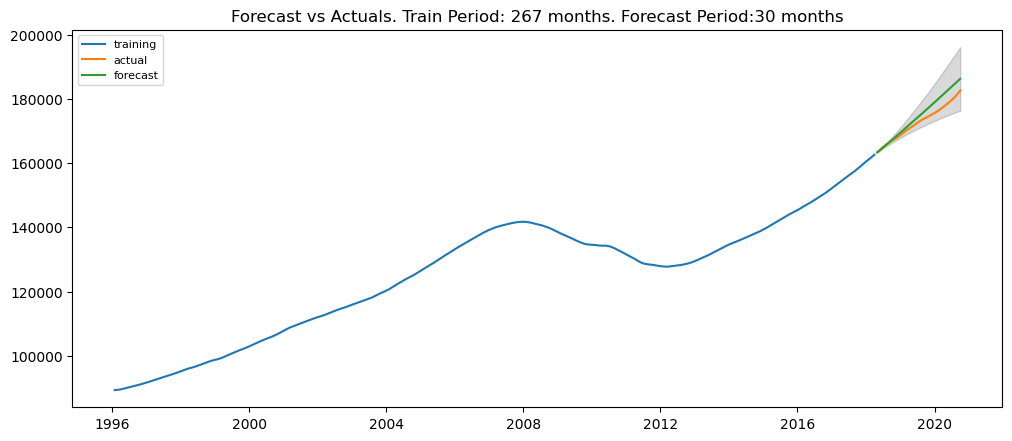

{'pdq_val': '(1, 2, 1)', 'mape': 0.011, 'me': 1976.063, 'mae': 2002.072, 'mpe': 0.011, 'rmse': 2509.771, 'corr': 0.998, 'minmax': 0.011}


In [344]:
ArimaModel(df,(1,2,1), .90) 

Cluster 2 Looks to be a good set for predictive modeling and investment. Let's export the set for further analysis

In [350]:
MonthlyHomeValues = dfMonthlyPrice.merge(clusters, on = 'ZipCode')
MonthlyHomeValues = MonthlyHomeValues.merge(dfHomeValue[['ZipCode','City','State','Metro']], on = 'ZipCode')
MonthlyHomeValues

,ZipCode,Date,Price,chg,labels,City,State,Metro
0,1001,1996-01-31,107177.00000,0.00000,0,Agawam,MA,Springfield
1,1001,1996-02-29,107337.00000,0.00149,0,Agawam,MA,Springfield
2,1001,1996-03-31,107736.00000,0.00372,0,Agawam,MA,Springfield
3,1001,1996-04-30,108221.00000,0.00450,0,Agawam,MA,Springfield
4,1001,1996-05-31,108519.00000,0.00275,0,Agawam,MA,Springfield
...,...,...,...,...,...,...,...,...
3942670,99587,2020-05-31,346390.00000,-0.00002,2,Anchorage,AK,Anchorage
3942671,99587,2020-06-30,346919.00000,0.00153,2,Anchorage,AK,Anchorage
3942672,99587,2020-07-31,350461.00000,0.01021,2,Anchorage,AK,Anchorage
3942673,99587,2020-08-31,353775.00000,0.00946,2,Anchorage,AK,Anchorage


In [351]:
MonthlyHomeValues.to_csv('HomeVals_Clustered.csv')
dfRent.to_csv('RentCleaned.csv')